Epoch 1/100
3/3 - 11s - loss: 0.6395 - 11s/epoch - 4s/step
Epoch 2/100
3/3 - 0s - loss: 0.4937 - 129ms/epoch - 43ms/step
Epoch 3/100
3/3 - 0s - loss: 0.3850 - 87ms/epoch - 29ms/step
Epoch 4/100
3/3 - 0s - loss: 0.2922 - 94ms/epoch - 31ms/step
Epoch 5/100
3/3 - 0s - loss: 0.2112 - 89ms/epoch - 30ms/step
Epoch 6/100
3/3 - 0s - loss: 0.1735 - 122ms/epoch - 41ms/step
Epoch 7/100
3/3 - 0s - loss: 0.1669 - 116ms/epoch - 39ms/step
Epoch 8/100
3/3 - 0s - loss: 0.1743 - 97ms/epoch - 32ms/step
Epoch 9/100
3/3 - 0s - loss: 0.1623 - 69ms/epoch - 23ms/step
Epoch 10/100
3/3 - 0s - loss: 0.1470 - 71ms/epoch - 24ms/step
Epoch 11/100
3/3 - 0s - loss: 0.1401 - 61ms/epoch - 20ms/step
Epoch 12/100
3/3 - 0s - loss: 0.1367 - 64ms/epoch - 21ms/step
Epoch 13/100
3/3 - 0s - loss: 0.1336 - 59ms/epoch - 20ms/step
Epoch 14/100
3/3 - 0s - loss: 0.1290 - 90ms/epoch - 30ms/step
Epoch 15/100
3/3 - 0s - loss: 0.1239 - 72ms/epoch - 24ms/step
Epoch 16/100
3/3 - 0s - loss: 0.1190 - 62ms/epoch - 21ms/step
Epoch 17/100
3/3

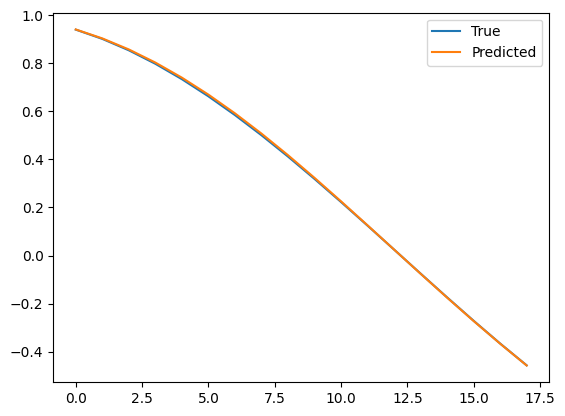

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Data Preparation
# Generate a time series dataset (e.g., sine wave)
def generate_data(start, end, step):
    time = np.arange(start, end, step)
    data = np.sin(time)  # Example: Generate a sine wave
    return data

data = generate_data(0, 10, 0.1)  # Generate data from 0 to 10 with step size 0.1

# Step 2: Build and Train the Model
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10  # Number of time steps to look back
X, y = create_dataset(data, time_steps)

# Reshape input data to [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the dataset into training and testing sets (80% train, 20% test)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Step 3: Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Visualize the predictions
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [ ]:
question 2

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
422/422 [==============================] - 50s 116ms/step - loss: 0.2523 - accuracy: 0.9275 - val_loss: 0.0750 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 2/10
422/422 [==============================] - 46s 110ms/step - loss: 0.0674 - accuracy: 0.9792 - val_loss: 0.0572 - val_accuracy: 0.9848 - lr: 0.0010
Epoch 3/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.0495 - val_accuracy: 0.9863 - lr: 0.0010
Epoch 4/10
422/422 [==============================] - 40s 95ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0544 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 5/10
422/422 [==============================] - 40s 94ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0438 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 6/10
422/422 [==============================] - 40s 94ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0426 - val_accuracy: 0.9897 - lr

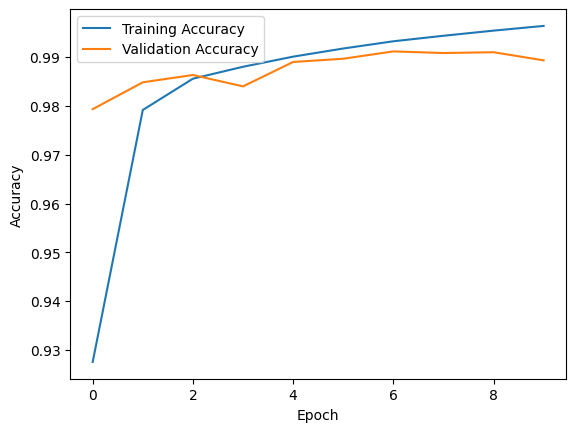

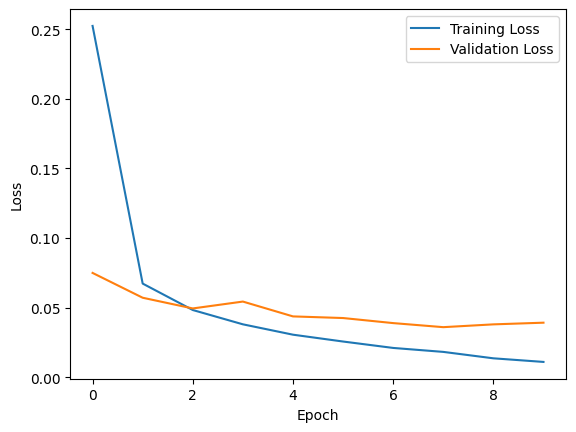

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Step 1: Data Loading and Preprocessing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data and reshape it
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Step 2: Build and Train the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, callbacks=[reduce_lr])

# Step 3: Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Step 4: Hyperparameter Optimization (Grid Search)
# You can perform grid search manually by training multiple models with different hyperparameters
# or use automated techniques like grid search provided by libraries like scikit-learn.

# Step 5: Callback Functions and Result Visualization
# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
